**The information in this table is related to housing prices in the country of Australia and the state of the Northern Territory.**

| Column name      | Description                                                                   |
|------------------|-------------------------------------------------------------------------------|
| breadcrumb       | A breadcrumb is a text trail that shows the user's location within a website. (String) |
| category_name    | The name of the category that the listing belongs to. (String)                   |
| property_type    | The type of property being listed. (String)                                     |
| building_size    | The size of the property's building, in square meters. (Numeric)                |
| land_size        | The size of the property's land, in square meters. (Numeric)                    |
| preferred_size   | The preferred size of the property, in square meters. (Numeric)                 |
| open_date        | The date that the property was first listed for sale. (Date)                    |
| listing_agency   | The agency that is listing the property. (String)                               |
| price            | The listing price of the property. (Numeric)                                    |
| location_number  | The number that corresponds to the property's location. (Numeric)               |
| location_type    | The type of location that the property is in. (String)                          |
| location_name    | The name of the location that the property is in. (String)                      |
| address          | The property's address. (String)                                                |
| address_1        | The first line of the property's address. (String)                              |
| city             | The city that the property is located in. (String)                              |
| state            | The state that the property is located in. (String)                             |
| zip_code         | The zip code that the property is located in. (String)                          |
| phone            | The listing agent's phone number. (String)                                      |
| latitude         | The property's latitude. (Numeric)                                              |
| longitude        | The property's longitude. (Numeric)                                              |
| product_depth    | The depth of the product. (Numeric)                                              |
| bedroom_count    | The number of bedrooms in the property. (Numeric)                                |
| bathroom_count   | The number of bathrooms in the property. (Numeric)                               |
| parking_count    | The number of parking spaces in the property. (Numeric)                         |
| RunDate          | The date that the listing was last updated. (Date)                              |


In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
np.set_printoptions(precision=15, floatmode='fixed')
import seaborn as sns
import matplotlib.pyplot as plt

import re
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('RealEstateAU_1000_Samples.csv')
df = pd.DataFrame(data)
df

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,...,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,...,NT,800,08 8941 8289,NaN,NaN,premiere,2.00,1.00,1.00,2022-05-27 15:54:05
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,...,NT,800,0411724000,NaN,NaN,premiere,3.00,2.00,2.00,2022-05-27 15:54:05
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,...,NT,800,08 8981 0080,NaN,NaN,premiere,2.00,1.00,1.00,2022-05-27 15:54:05
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,...,NT,800,08 8982 2403,NaN,NaN,premiere,1.00,1.00,0.00,2022-05-27 15:54:05
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Added yesterday,Carol Need Real Estate - Fannie Bay,...,NT,800,0418885966,NaN,NaN,premiere,3.00,2.00,2.00,2022-05-27 15:54:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1351983,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,NaN,9.17ha,9.17ha,Under offer,United Realty NT - Parap,...,NT,834,08 8981 2666,NaN,NaN,feature,4.00,3.00,6.00,2022-05-27 15:54:05
996,996,1351984,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,203m²,600m²,600m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.00,2.00,2.00,2022-05-27 15:54:05
997,997,1351985,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,209.6m²,800m²,800m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.00,2.00,2.00,2022-05-27 15:54:05
998,998,1351986,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,180m²,450m²,450m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,810,08 89834326,NaN,NaN,standard,4.00,2.00,3.00,2022-05-27 15:54:05


# Data cleaning

In [3]:
df.isna().sum()

index                 0
TID                   0
breadcrumb            0
category_name         0
property_type         0
building_size       720
land_size           467
preferred_size      391
open_date           698
listing_agency        0
price                 0
location_number       0
location_type         0
location_name         0
address              12
address_1            12
city                  0
state                 0
zip_code              0
phone                 0
latitude           1000
longitude          1000
product_depth         0
bedroom_count        33
bathroom_count       33
parking_count        33
RunDate               0
dtype: int64

*We ran the code df.isna().sum() to check the number of missing values (NaN) in each column of the dataset. This is an essential step in the data cleaning process, as it helps us identify the columns that may require special attention or treatment.*

In [4]:
df = df.drop(columns=['building_size','land_size','preferred_size','open_date','latitude','longitude'])
df.isna().sum()

index               0
TID                 0
breadcrumb          0
category_name       0
property_type       0
listing_agency      0
price               0
location_number     0
location_type       0
location_name       0
address            12
address_1          12
city                0
state               0
zip_code            0
phone               0
product_depth       0
bedroom_count      33
bathroom_count     33
parking_count      33
RunDate             0
dtype: int64

We ran the code to drop the columns `building_size`, `land_size`, `preferred_size`, `open_date`, `latitude`, and `longitude` from the dataframe.

1. **Building Size, Land Size, and Preferred Size:** These columns had a substantial number of missing values, and if they are not essential to the analysis, dropping them simplifies the data handling.
2. **Open Date:** This had a significant number of missing values and was dropped for similar reasons.
3. **Latitude and Longitude:** Since all the values were missing in these columns, they were removed as they provide no information.


In [5]:

# Finding pairs of columns with more than 90% similarity
duplicate_columns = []
threshold = 0.9 * len(df)

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and (col2, col1) not in duplicate_columns:
            similarity_count = (df[col1] == df[col2]).sum()
            if similarity_count > threshold:
                duplicate_columns.append((col1, col2))

duplicate_columns


[('price', 'location_name')]

Identifying columns that are highly similar helps in detecting redundancy, which can be a sign of data duplication or unnecessary repetition and Removing redundant columns can reduce the complexity of the dataset, making subsequent analyses more efficient and interpretable.

### Interpretation of Results:
The result indicates that the columns `price` and `location_name` have more than 90% similarity. This finding may be surprising, as price and location name are not typically expected to be similar. It might be worth investigating this further to understand the relationship between these columns and decide whether one of them should be removed or whether there's an underlying issue in the data.

In [6]:
df = df.drop(columns=['location_name'])

As identified earlier, the location_name column had more than 90% similarity with the price column. Dropping it helps eliminate redundancy in the dataset.

In [7]:
# Checking if all values in each column are the same
columns_with_same_values = []

for col in df.columns:
    first_value = df[col].iloc[0]
    if df[col].eq(first_value).all():
        columns_with_same_values.append(col)

columns_with_same_values


['location_type', 'state', 'RunDate']

Constant columns (i.e., columns where all values are the same) don't contribute to statistical analyses or models, as they don't provide any differentiation between observations.

In [8]:
df = df.drop(columns=['location_type','state','RunDate'])

In [9]:
df = df.drop(columns=['index','TID','breadcrumb','category_name','address','address_1','phone'])

*The remaining columns are those whose information is directly given in other columns or are not worth checking, such as an index*

In [10]:
df.isna().sum()

property_type       0
listing_agency      0
price               0
location_number     0
city                0
zip_code            0
product_depth       0
bedroom_count      33
bathroom_count     33
parking_count      33
dtype: int64

In [11]:
df = df.dropna()
df.isna().sum()

property_type      0
listing_agency     0
price              0
location_number    0
city               0
zip_code           0
product_depth      0
bedroom_count      0
bathroom_count     0
parking_count      0
dtype: int64

In [12]:
df

,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,"$435,000",139468611,Darwin City,800,premiere,2.00,1.00,1.00
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,"Offers Over $320,000",139463755,Darwin City,800,premiere,3.00,2.00,2.00
2,Unit,Habitat Real Estate - THE GARDENS,"$310,000",139462495,Darwin City,800,premiere,2.00,1.00,1.00
3,House,Ray White - NIGHTCLIFF,"$259,000",139451679,Darwin City,800,premiere,1.00,1.00,0.00
4,Unit,Carol Need Real Estate - Fannie Bay,"$439,000",139433803,Darwin City,800,premiere,3.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...
995,House,United Realty NT - Parap,2 Residence,138346247,Virginia,834,feature,4.00,3.00,6.00
996,House,Kassiou Constructions - HOWARD SPRINGS,"$601,000",138333062,Humpty Doo,836,standard,4.00,2.00,2.00
997,House,Kassiou Constructions - HOWARD SPRINGS,"$655,000",138333058,Humpty Doo,836,standard,4.00,2.00,2.00
998,House,Kassiou Constructions - HOWARD SPRINGS,"$675,000",138333050,Lee Point,810,standard,4.00,2.00,3.00


In [13]:
# function to extract price from the text
def extract_price(price_text):
    # Using regex to find a pattern that matches the price and ignores any following text
    price_match = re.search(r'\$[\d, ]*(?:\.\d{2})?', str(price_text))
    if price_match:
        # Remove spaces from the captured price and return
        return price_match.group(0).replace(' ', '').replace(',', '')
    else:
        return None

# Applying the improved function to the "price" column
df['price'] = df['price'].apply(extract_price)

df.head(3)


,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,$435000,139468611,Darwin City,800,premiere,2.00,1.00,1.00
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,$320000,139463755,Darwin City,800,premiere,3.00,2.00,2.00
2,Unit,Habitat Real Estate - THE GARDENS,$310000,139462495,Darwin City,800,premiere,2.00,1.00,1.00



The `price` column may contain textual information or additional characters. The function uses a regular expression (regex) to extract the numeric price value, including the currency symbol.By applying this function to the `price` column, we transform the prices into a consistent format that can be used for numerical analysis.


In [14]:
df.isna().sum()

property_type        0
listing_agency       0
price              223
location_number      0
city                 0
zip_code             0
product_depth        0
bedroom_count        0
bathroom_count       0
parking_count        0
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum()

property_type      0
listing_agency     0
price              0
location_number    0
city               0
zip_code           0
product_depth      0
bedroom_count      0
bathroom_count     0
parking_count      0
dtype: int64

In [16]:
df_copy = df.copy()
df_copy['price'] = df_copy['price'].replace('[\$,.]', '', regex=True).astype(int)
df = df_copy
df= df.reset_index(drop=True)
df

,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,435000,139468611,Darwin City,800,premiere,2.00,1.00,1.00
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,320000,139463755,Darwin City,800,premiere,3.00,2.00,2.00
2,Unit,Habitat Real Estate - THE GARDENS,310000,139462495,Darwin City,800,premiere,2.00,1.00,1.00
3,House,Ray White - NIGHTCLIFF,259000,139451679,Darwin City,800,premiere,1.00,1.00,0.00
4,Unit,Carol Need Real Estate - Fannie Bay,439000,139433803,Darwin City,800,premiere,3.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...
739,House,Real Estate Central - DARWIN CITY,495000,138350855,Woodroffe,830,feature,4.00,2.00,2.00
740,House,Kassiou Constructions - HOWARD SPRINGS,601000,138333062,Humpty Doo,836,standard,4.00,2.00,2.00
741,House,Kassiou Constructions - HOWARD SPRINGS,655000,138333058,Humpty Doo,836,standard,4.00,2.00,2.00
742,House,Kassiou Constructions - HOWARD SPRINGS,675000,138333050,Lee Point,810,standard,4.00,2.00,3.00


By removing currency symbols and commas, and converting the `price` column to an integer type, you have ensured that this column is now in a numerical format suitable for statistical analysis and modeling.

In [17]:
#The function check_dtypes inspects the unique data types in each column of the dataframe.
def check_dtypes(df):
    dtypes = []
    for col in df.columns:
        dtypes.append( (col, df[col].apply(type).unique()) ) 
    return pd.DataFrame(dtypes, columns=['Column Name', 'Data Type'])


In [18]:
check_dtypes(df)

,Column Name,Data Type
0,property_type,[<class 'str'>]
1,listing_agency,[<class 'str'>]
2,price,[<class 'int'>]
3,location_number,[<class 'int'>]
4,city,[<class 'str'>]
5,zip_code,[<class 'int'>]
6,product_depth,[<class 'str'>]
7,bedroom_count,[<class 'float'>]
8,bathroom_count,[<class 'float'>]
9,parking_count,[<class 'float'>]


In [19]:
negative_count = df[['price','location_number','zip_code','bedroom_count','bathroom_count','parking_count']].apply(lambda x: (x < 0).sum())
negative_count

price              0
location_number    0
zip_code           0
bedroom_count      0
bathroom_count     0
parking_count      0
dtype: int64

checks for negative values in the specified numeric columns: `'price'`, `'location_number'`, `'zip_code'`, `'bedroom_count'`, `'bathroom_count'`, and `'parking_count'`.

Negative values in these columns might not make logical sense (e.g., negative price or negative bedroom count), so checking for them helps identify potential errors or inconsistencies in the data.

# Noise Detecting

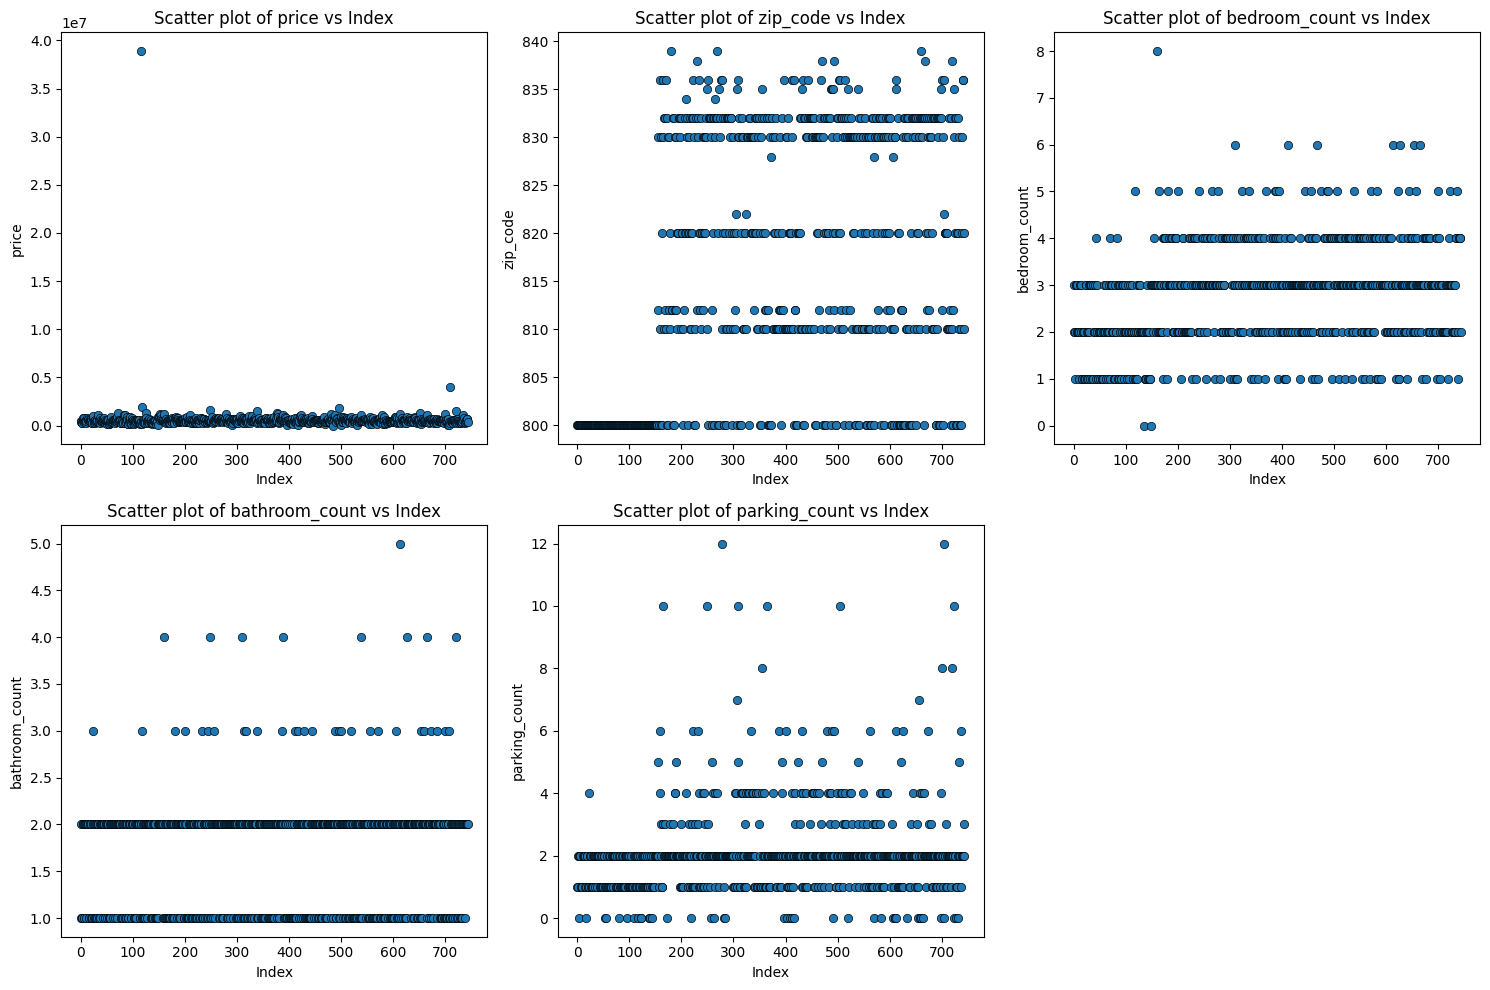

In [20]:
plot_cols = df.columns[ df.columns.isin(['price','zip_code','bedroom_count','bathroom_count','parking_count']) ]

# Calculate the number of rows for subplots
n_cols = 3
n_rows = -(-len(plot_cols) // n_cols)  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)

for i, col in enumerate(plot_cols):
    row, col_idx = divmod(i, n_cols)
    sns.scatterplot(data=df, x=df.index, y=col, edgecolor="0", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Scatter plot of {col} vs Index')
    axes[row, col_idx].set_xlabel('Index')
    axes[row, col_idx].set_ylabel(col)

# Remove empty subplots
for j in range(i+1, n_rows*n_cols):
    row, col_idx = divmod(j, n_cols)
    fig.delaxes(axes[row][col_idx])

plt.tight_layout()
plt.show()

The scatter plots you requested have been created for the columns `'price'`, `'zip_code'`, `'bedroom_count'`, `'bathroom_count'`, and `'parking_count'`. Each plot shows the respective column's values plotted against the index.

### Interpretation of Results:
- **Price:** Seems to have a varied distribution, with most properties falling in a specific range, but there are some higher-priced outliers.
- **Zip Code:** The distribution appears consistent, with no noticeable outliers.
- **Bedroom Count, Bathroom Count, Parking Count:** These features show discrete values, as expected, with no apparent anomalies.

In [21]:
df['price'].nsmallest(10)

485         1
705       115
530       460
291       630
708       645
418       695
499       695
396       800
148     99950
408    115000
Name: price, dtype: int32

In [22]:
df = df[ df['price'] < 3990000 ]
df = df[ df['price'] > 800 ]
df = df.reset_index(drop=True)

By applying this filter, we removing outlier properties that have unusually high prices. This can help ensure that the analysis focuses on a more typical range of properties.

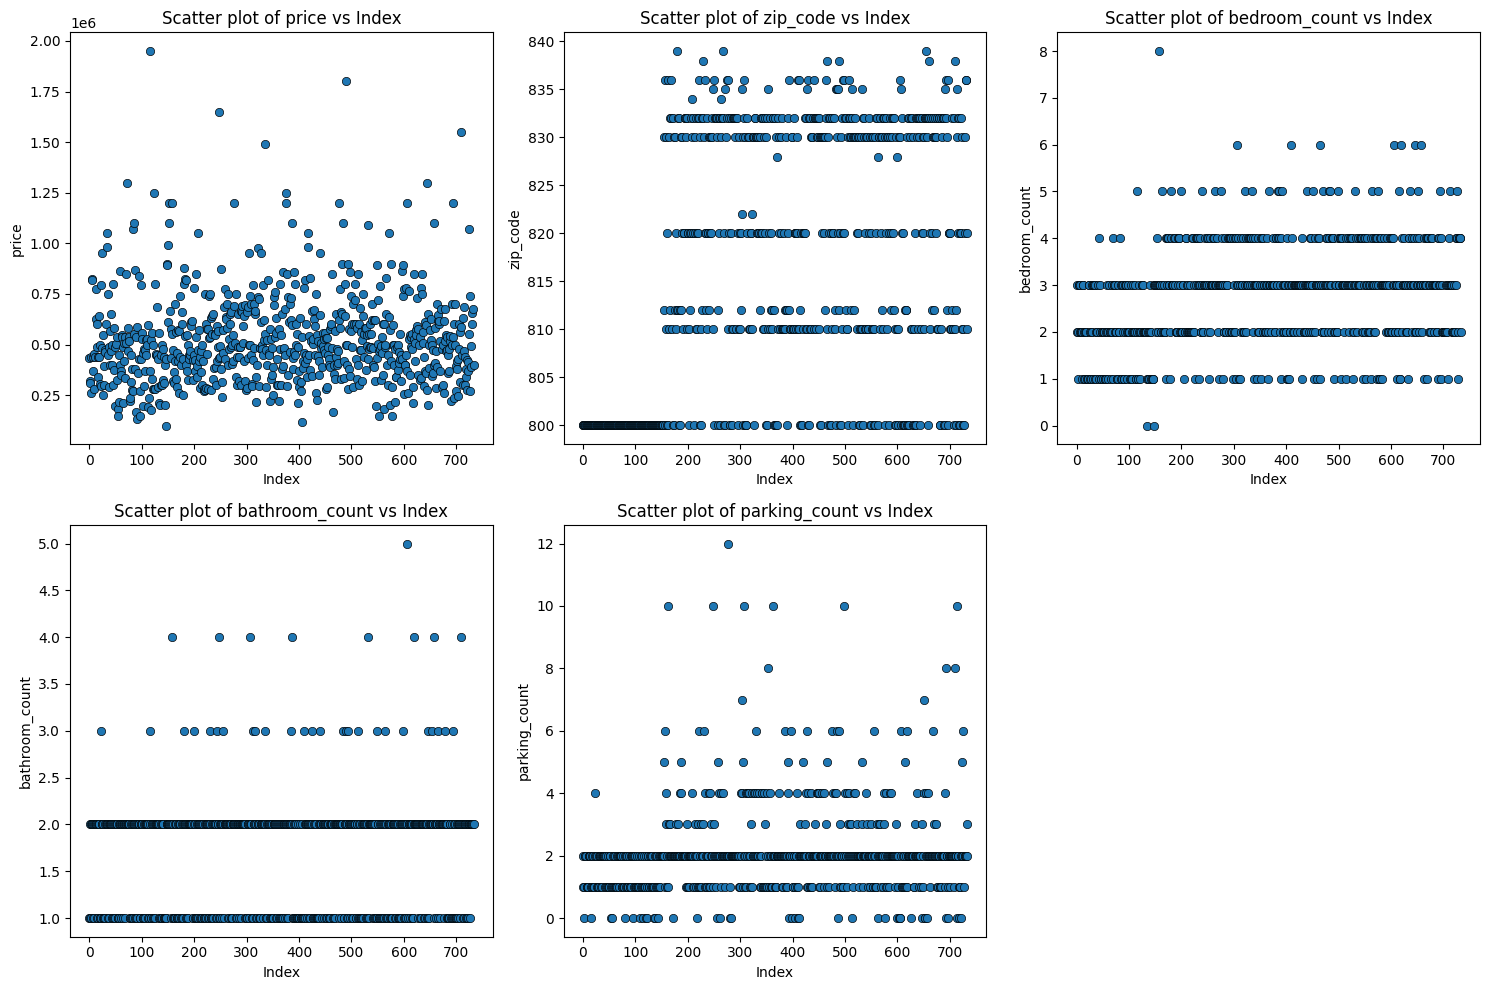

In [23]:
plot_cols = df.columns[ df.columns.isin(['price','zip_code','bedroom_count','bathroom_count','parking_count']) ]

# Calculate the number of rows for subplots
n_cols = 3
n_rows = -(-len(plot_cols) // n_cols)  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)

for i, col in enumerate(plot_cols):
    row, col_idx = divmod(i, n_cols)
    sns.scatterplot(data=df, x=df.index, y=col, edgecolor="0", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Scatter plot of {col} vs Index')
    axes[row, col_idx].set_xlabel('Index')
    axes[row, col_idx].set_ylabel(col)

# Remove empty subplots
for j in range(i+1, n_rows*n_cols):
    row, col_idx = divmod(j, n_cols)
    fig.delaxes(axes[row][col_idx])

plt.tight_layout()
plt.show()

# EDA

In [24]:
df.describe()

,price,location_number,zip_code,bedroom_count,bathroom_count,parking_count
count,734.00,734.00,734.00,734.00,734.00,734.00
mean,524235.35,141522784.92,816.24,2.76,1.69,2.07
std,225427.34,41668389.19,13.67,1.09,0.60,1.47
min,99950.00,108530451.00,800.00,0.00,1.00,0.00
25%,381250.00,138611055.00,800.00,2.00,1.00,1.00
50%,489500.00,138997529.00,812.00,3.00,2.00,2.00
75%,610000.00,139276203.00,830.00,3.00,2.00,2.00
max,1950000.00,700199623.00,839.00,8.00,5.00,12.00


Certainly! Let's delve deeper into the descriptive statistics provided for the dataset:

### 1. Price:
- **Range:** The minimum price is \$99950 , and the maximum is \$1,950,000. This wide range indicates significant diversity in the property prices.
- **Mean:** The average price is approximately \$518,588.7, suggesting a central tendency towards this value.
- **Quartiles:** 50% of the properties are priced between \$380,000 (25th percentile) and \$610,000 (75th percentile).
- **Standard Deviation:** A standard deviation of \$230,647.5 indicates the spread or variability in the prices.

### 2. Location Number:
- **Range and Mean:** These values may correspond to specific location codes or identifiers. A deeper understanding of what this number represents would provide more insights.

### 3. Zip Code:
- **Range:** Zip codes range from 800 to 839, indicating the geographic coverage of the dataset.
- **Mean:** The mean zip code value may not provide significant insights, as zip codes are categorical rather than continuous variables.

### 4. Bedroom Count:
- **Range:** From 0 to 8 bedrooms, indicating a variety of property sizes.
- **Mean:** The average number of bedrooms is approximately 2.77.
- **Standard Deviation:** A standard deviation of 1.09 suggests moderate variability in bedroom counts.

### 5. Bathroom Count:
- **Range:** 1 to 5 bathrooms, indicating diversity in amenities.
- **Mean:** The average number of bathrooms is around 1.70.
- **Standard Deviation:** A standard deviation of 0.61 suggests most properties have 1 or 2 bathrooms.

### 6. Parking Count:
- **Range:** From 0 to 12 parking spaces, highlighting varied parking facilities.
- **Mean:** The average number of parking spaces is approximately 2.10.
- **Standard Deviation:** A standard deviation of 1.51 indicates a wider spread in parking availability.


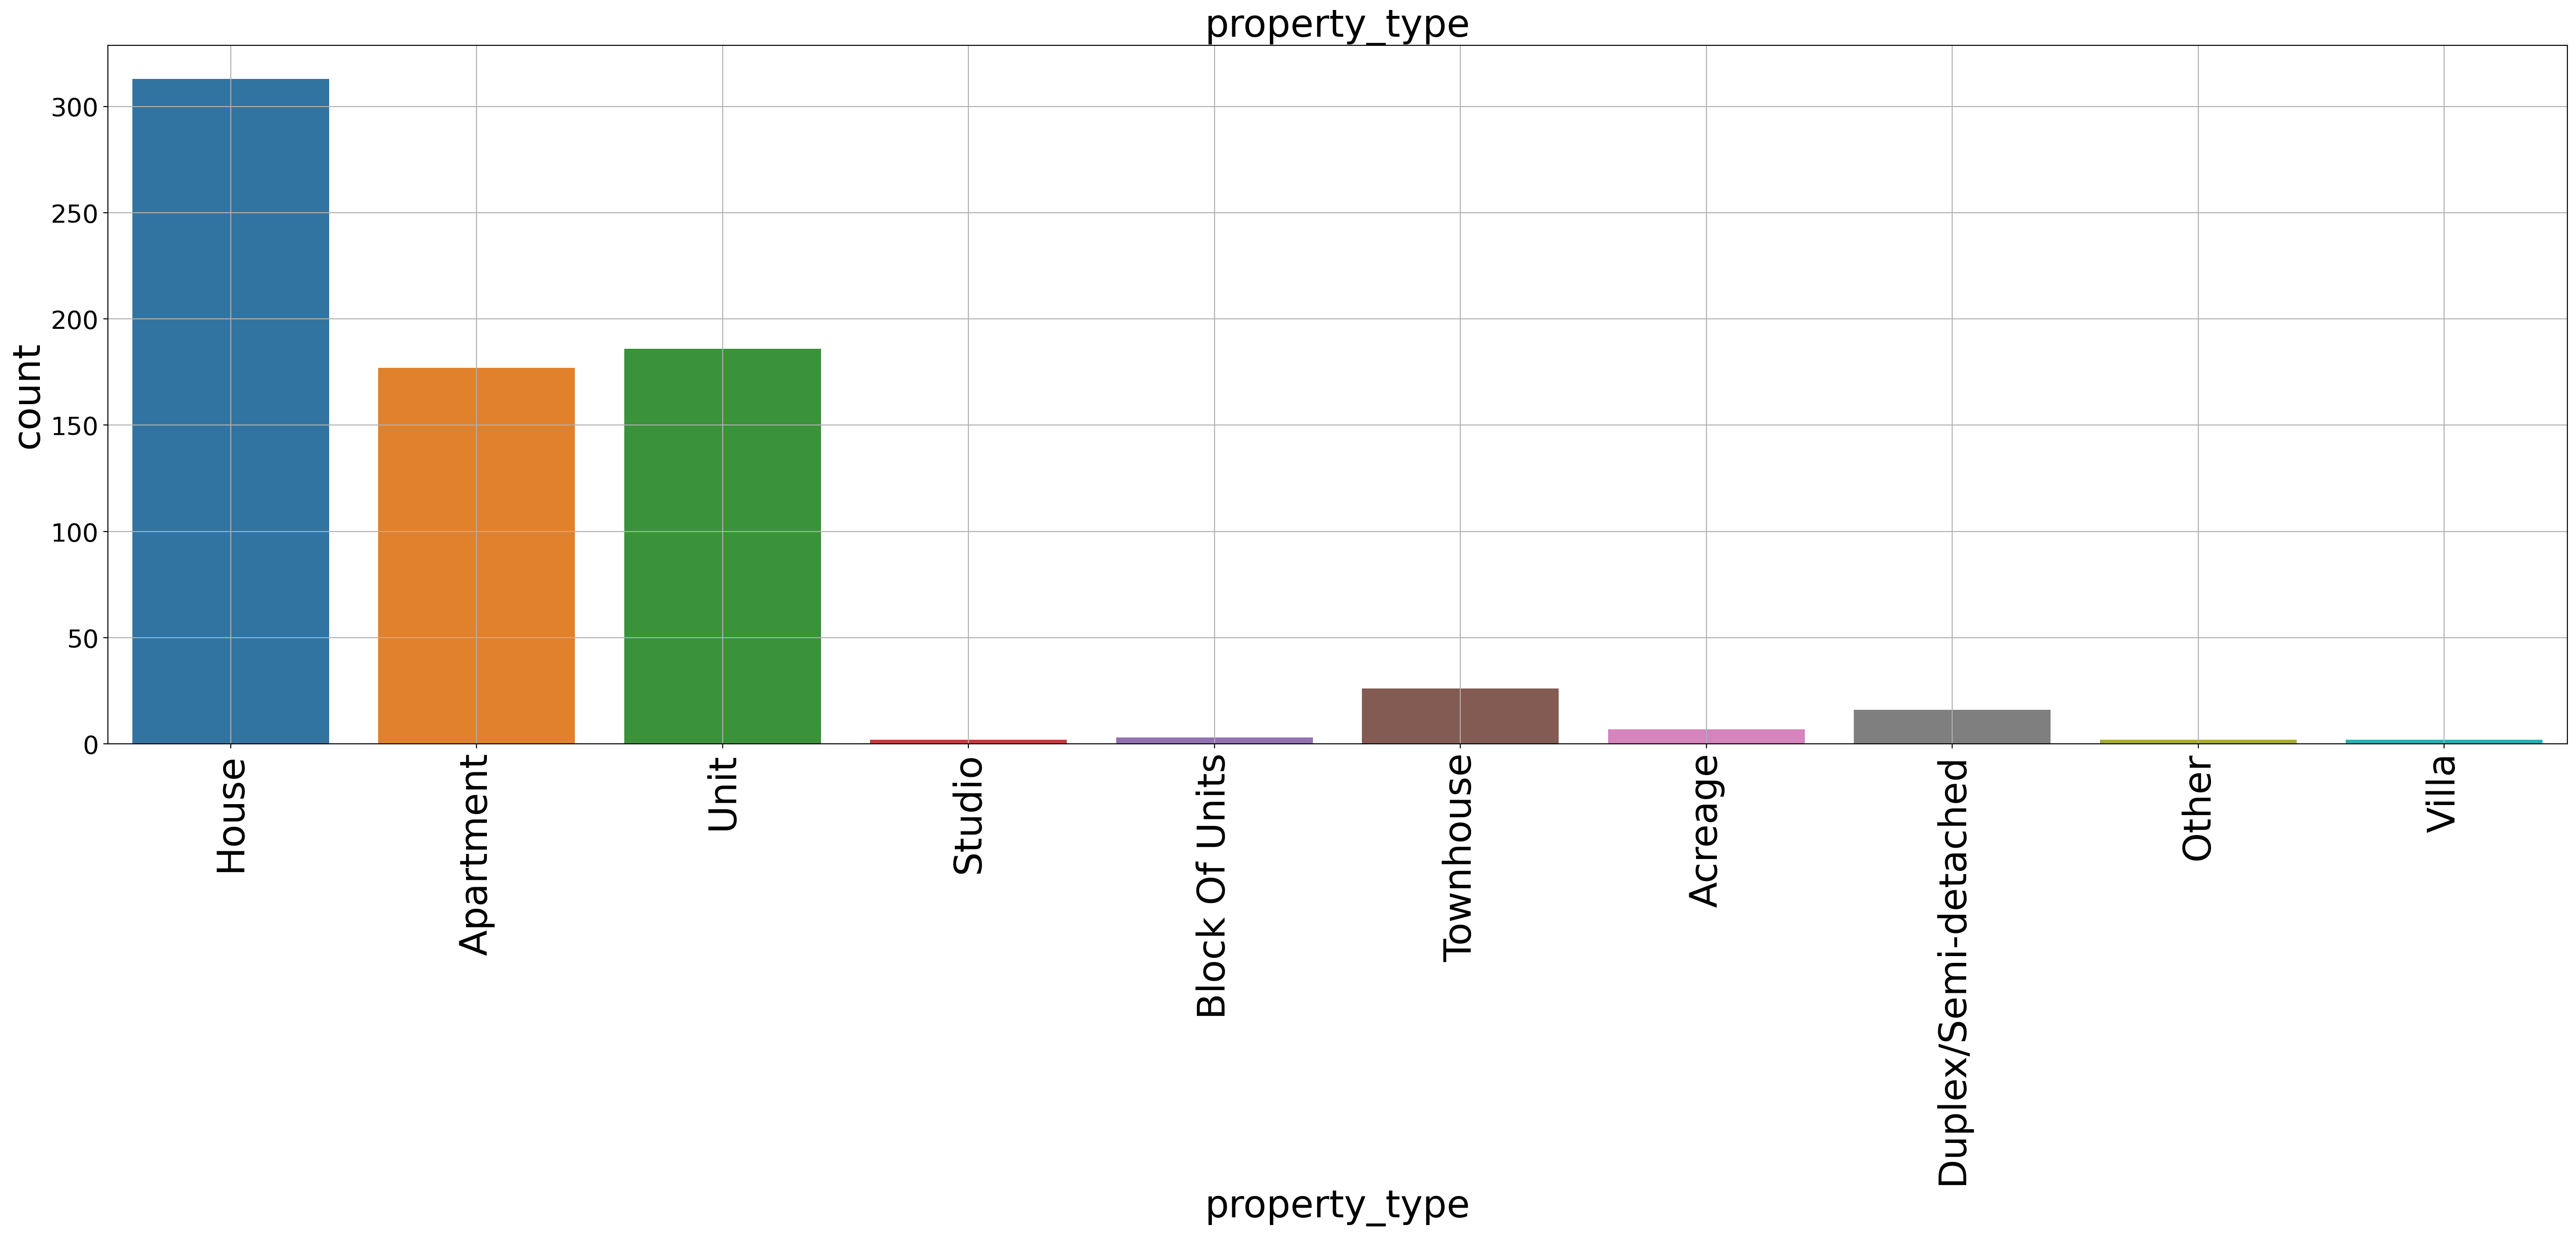

In [25]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='property_type' , data= df )
plt.xlabel('property_type',fontsize=30)
plt.xticks(rotation = 90 , fontsize=30)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('property_type' , fontsize=30)
plt.grid()
plt.show()

Here's a summary of what we observe:

- **House**: The most common property type, with a significant number of listings.
- **Unit**: The second most common property type, also with a substantial number of listings.
- **Apartment**: Fewer listings than houses and units, but still a noticeable presence.
- **Other Types**: A few other property types, such as "Land" and "Townhouse," have smaller counts in the dataset.

Understanding the distribution of property types can inform further analysis, segmentation, or modeling, as different types of properties may have distinct price patterns, features, or market behaviors.

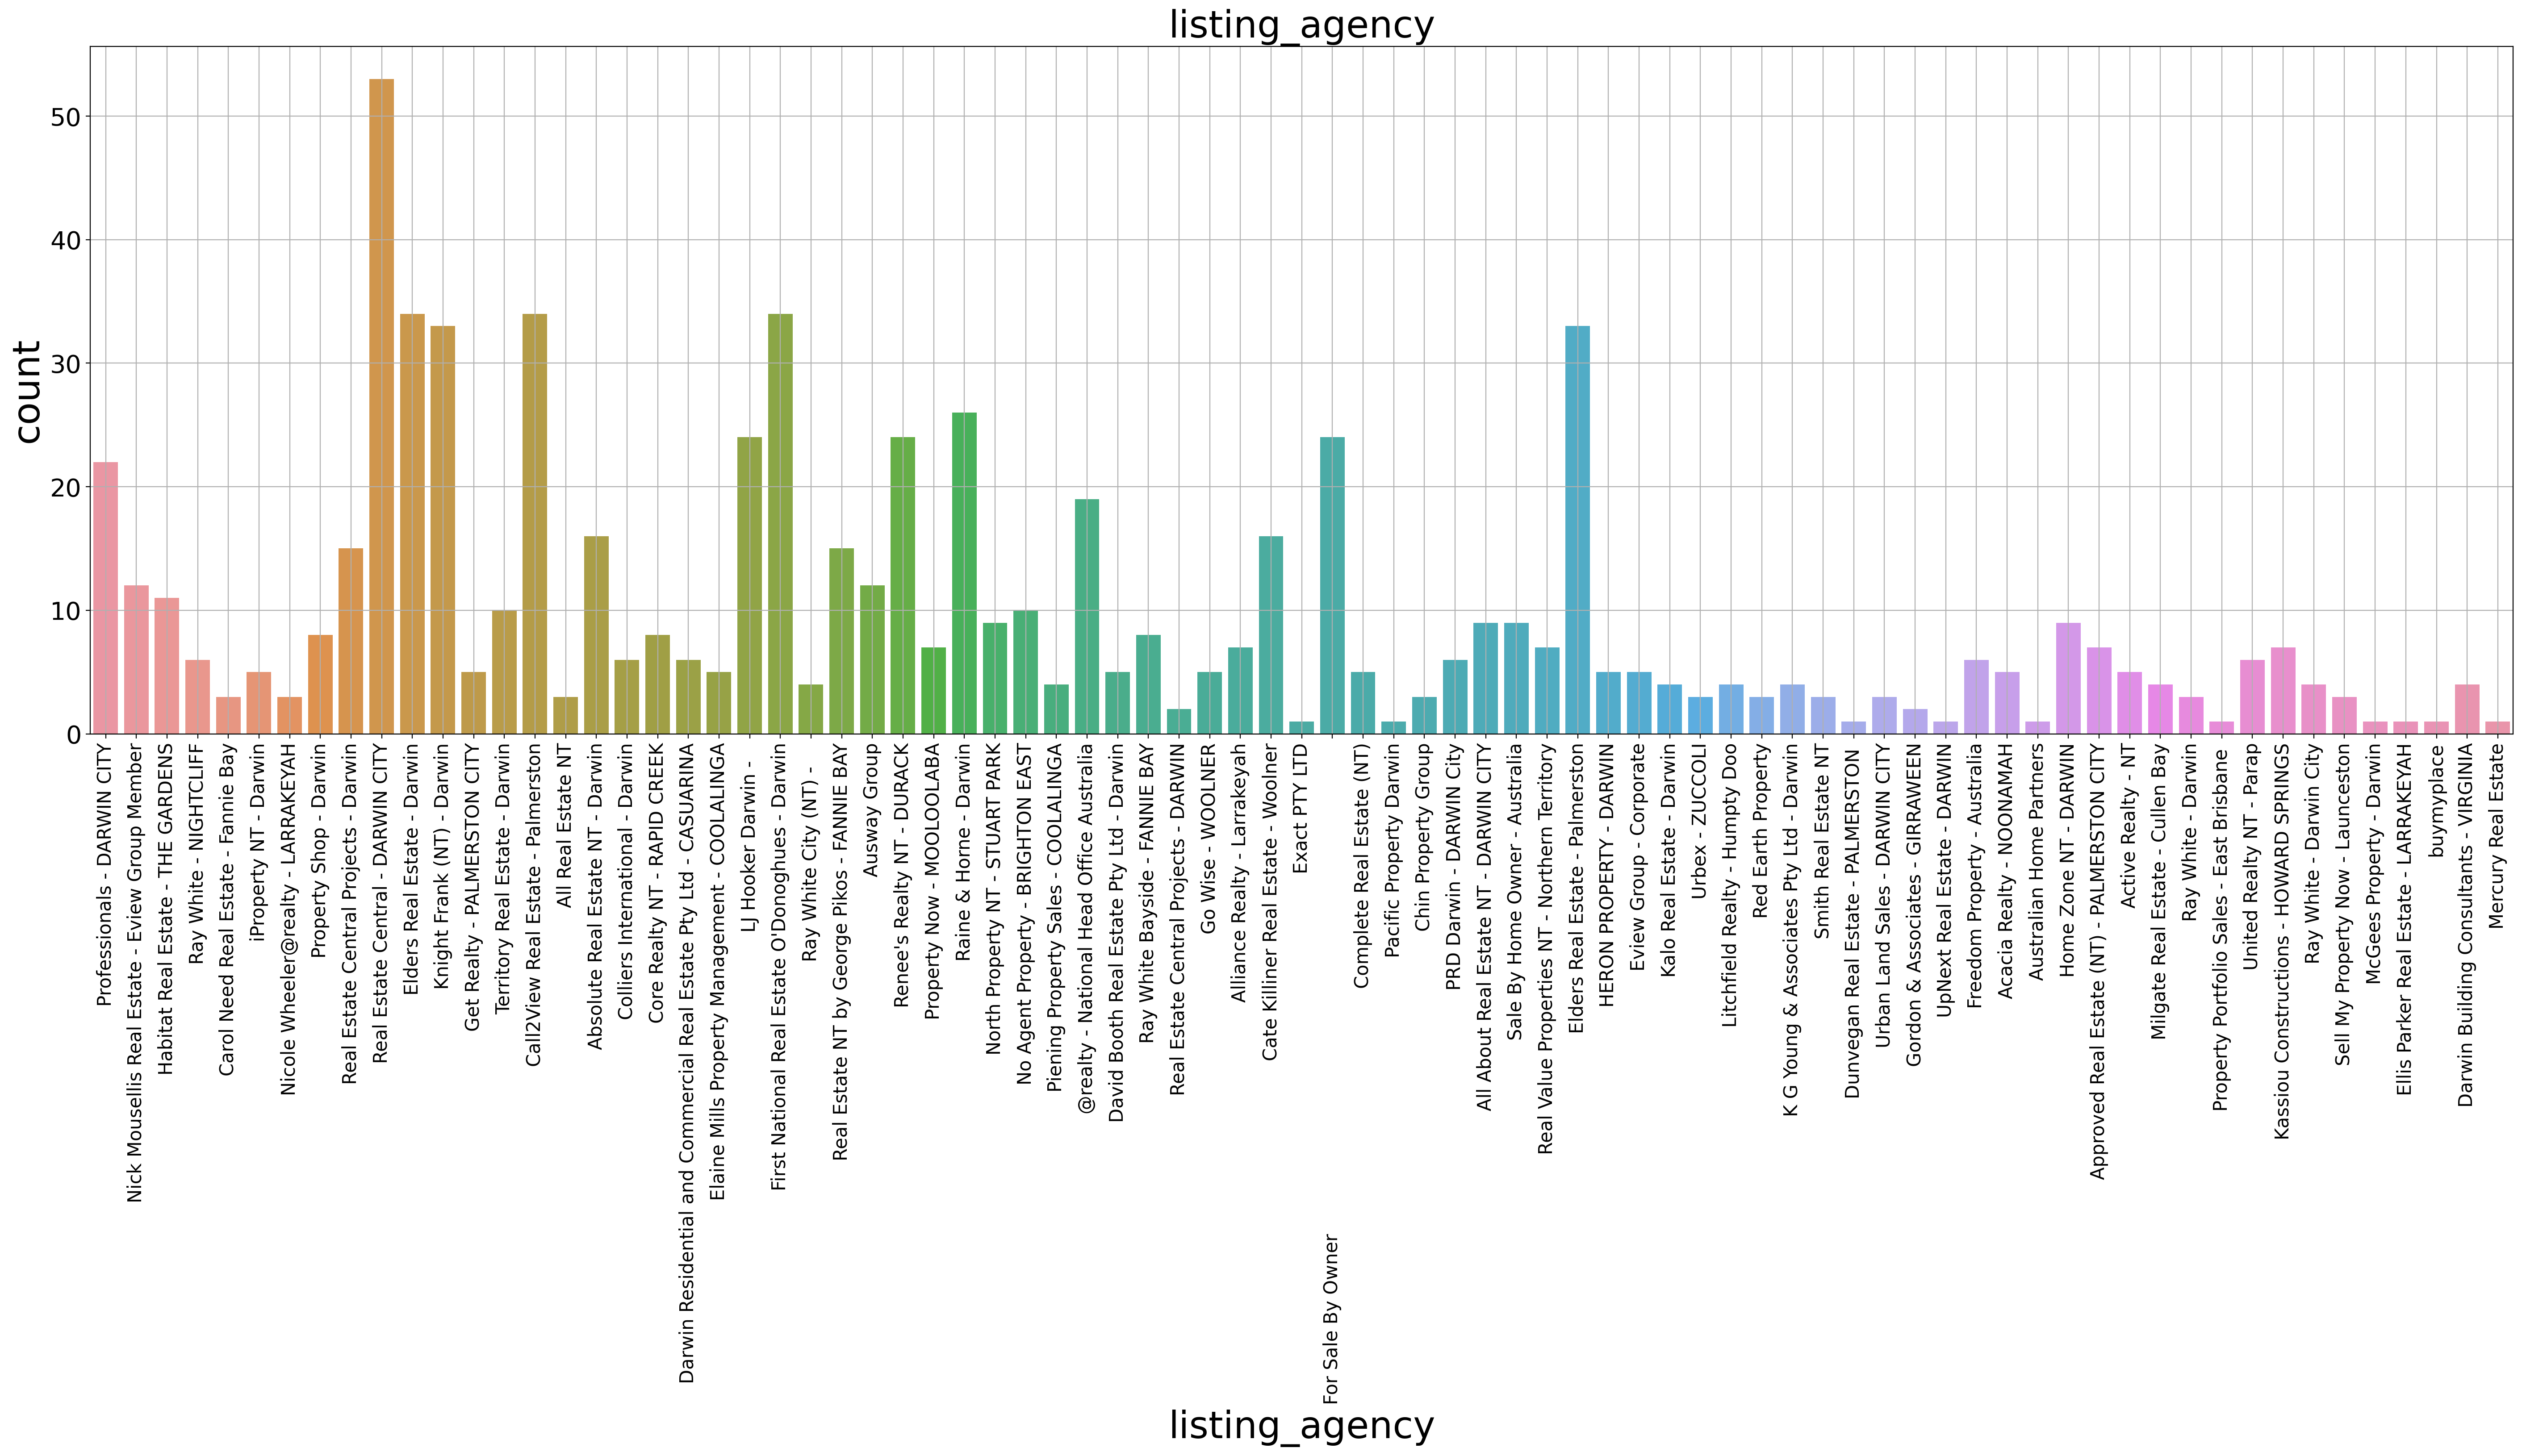

In [26]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='listing_agency' , data= df )
plt.xlabel('listing_agency',fontsize=30)
plt.xticks(rotation = 90 , fontsize=15)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('listing_agency' , fontsize=30)
plt.grid()
plt.show()

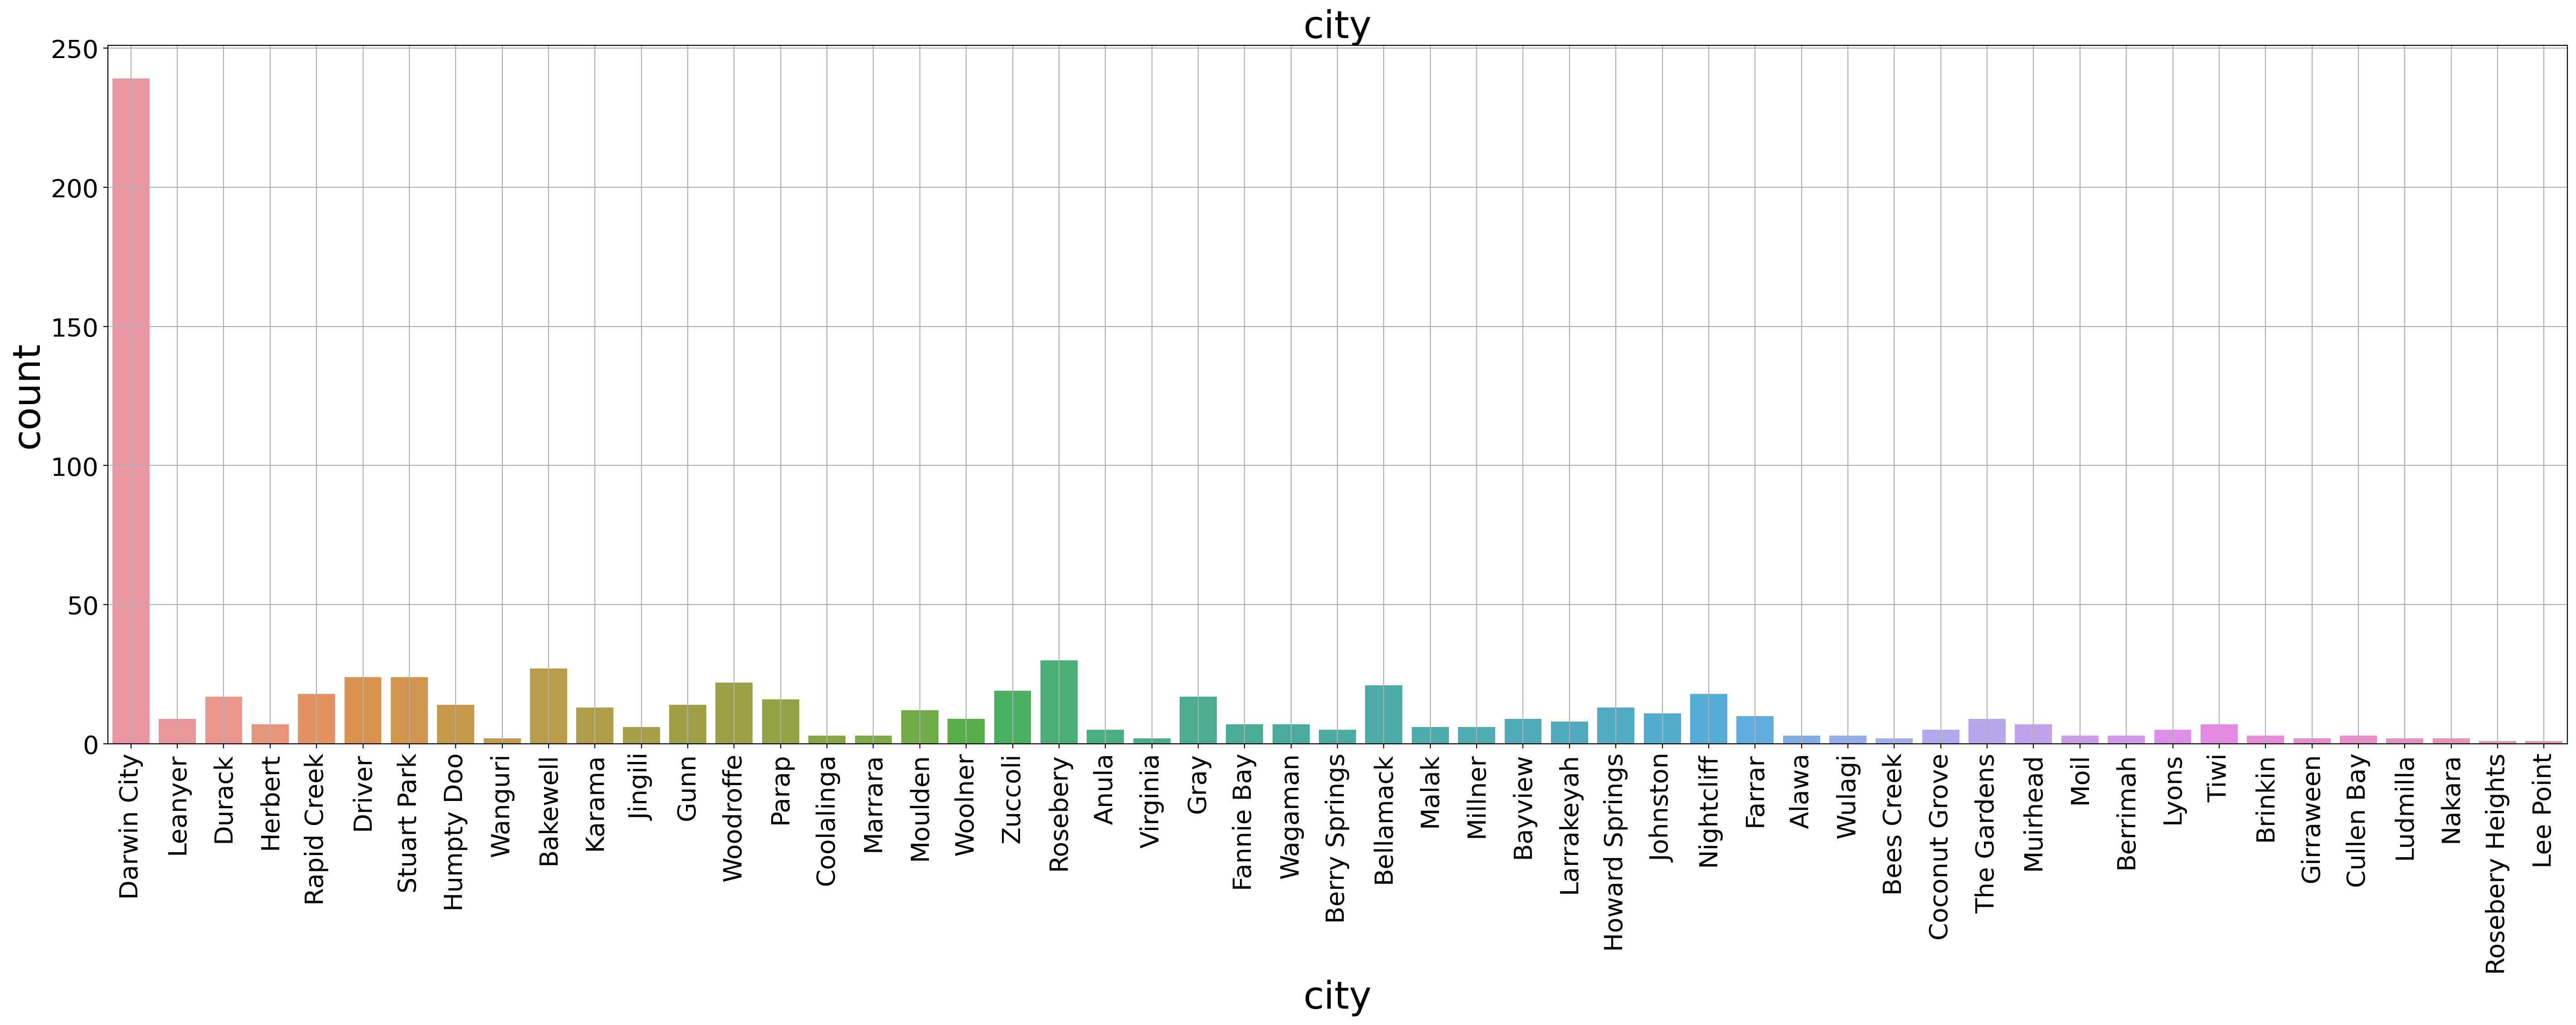

In [27]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='city' , data= df )
plt.xlabel('city',fontsize=30)
plt.xticks(rotation = 90 , fontsize=20)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('city' , fontsize=30)
plt.grid()
plt.show()

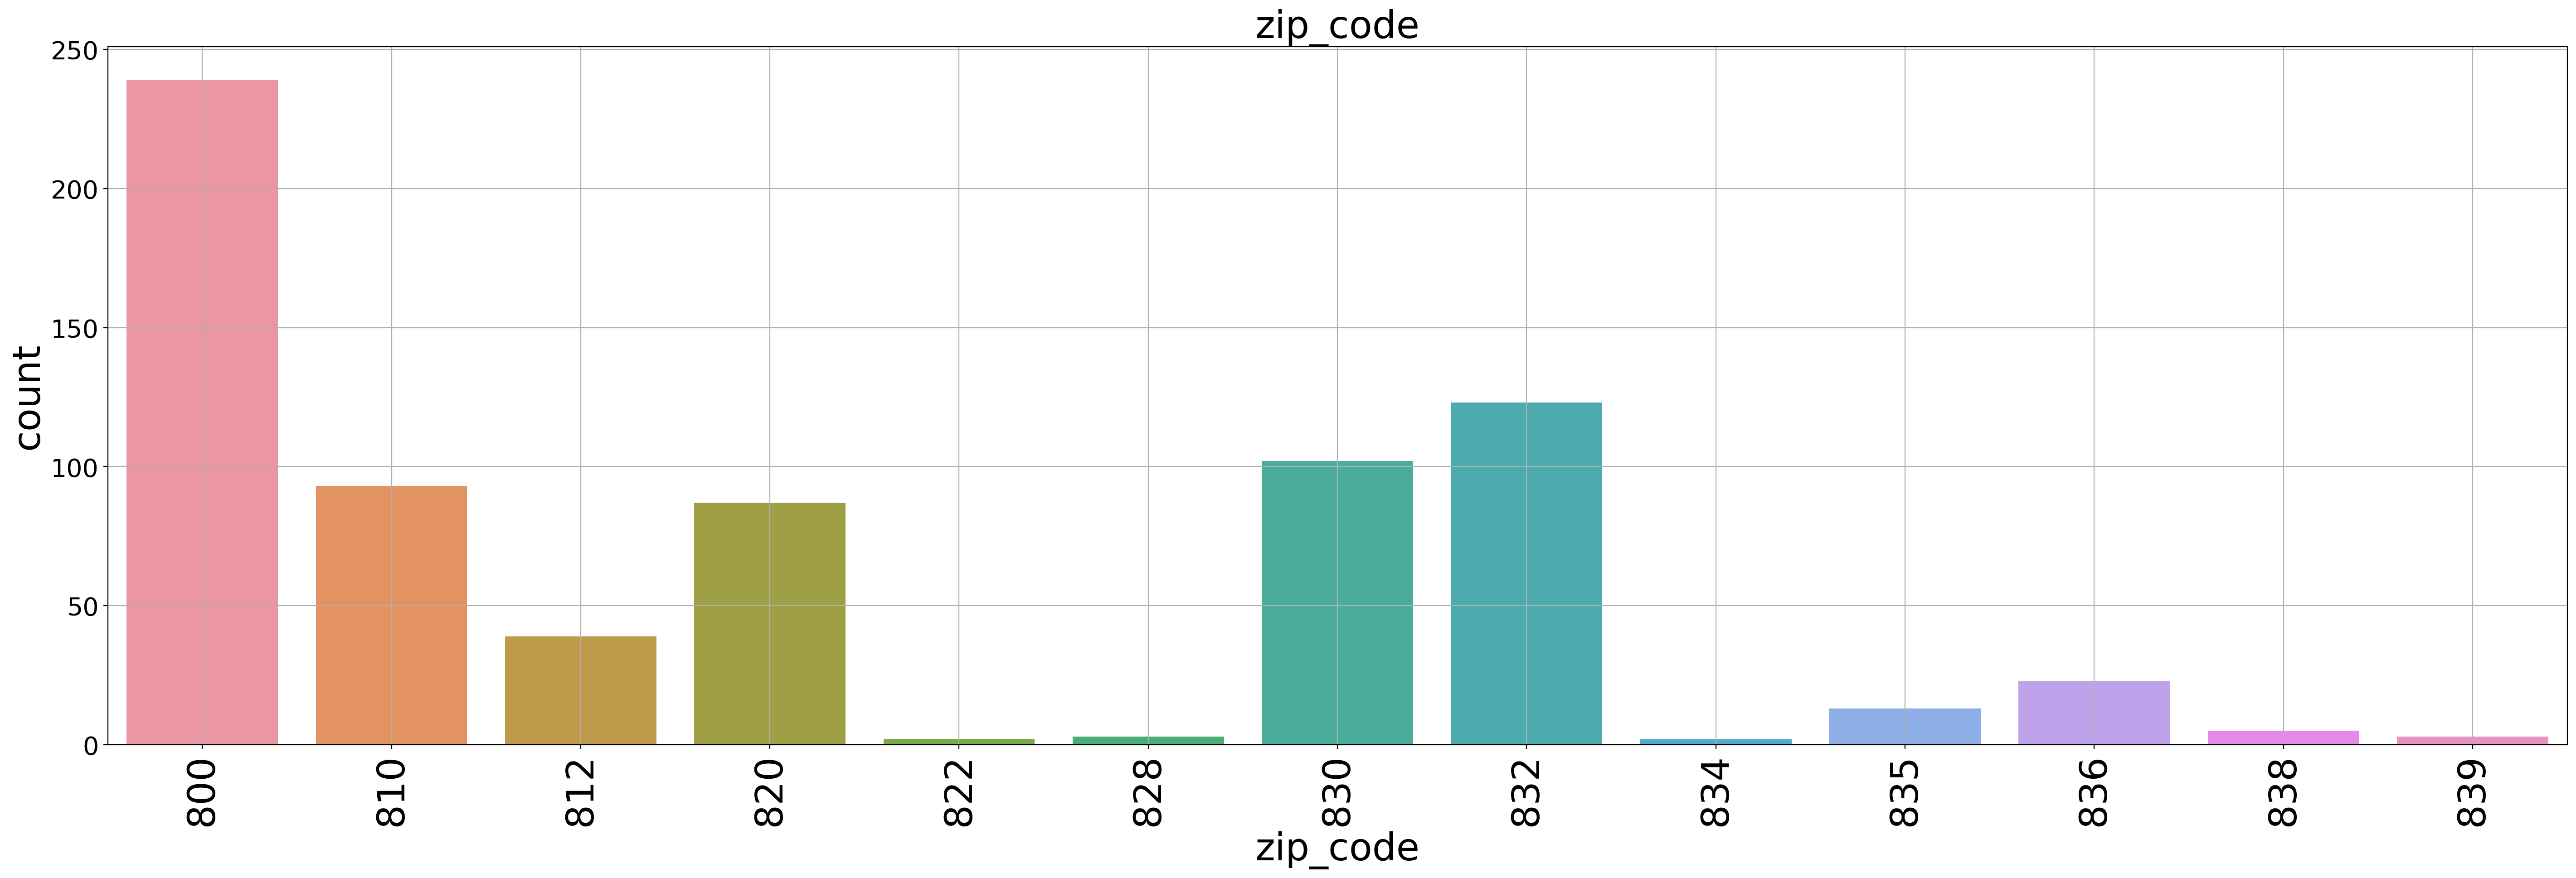

In [28]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='zip_code' , data= df )
plt.xlabel('zip_code',fontsize=30)
plt.xticks(rotation = 90 , fontsize=30)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('zip_code' , fontsize=30)
plt.grid()
plt.show()

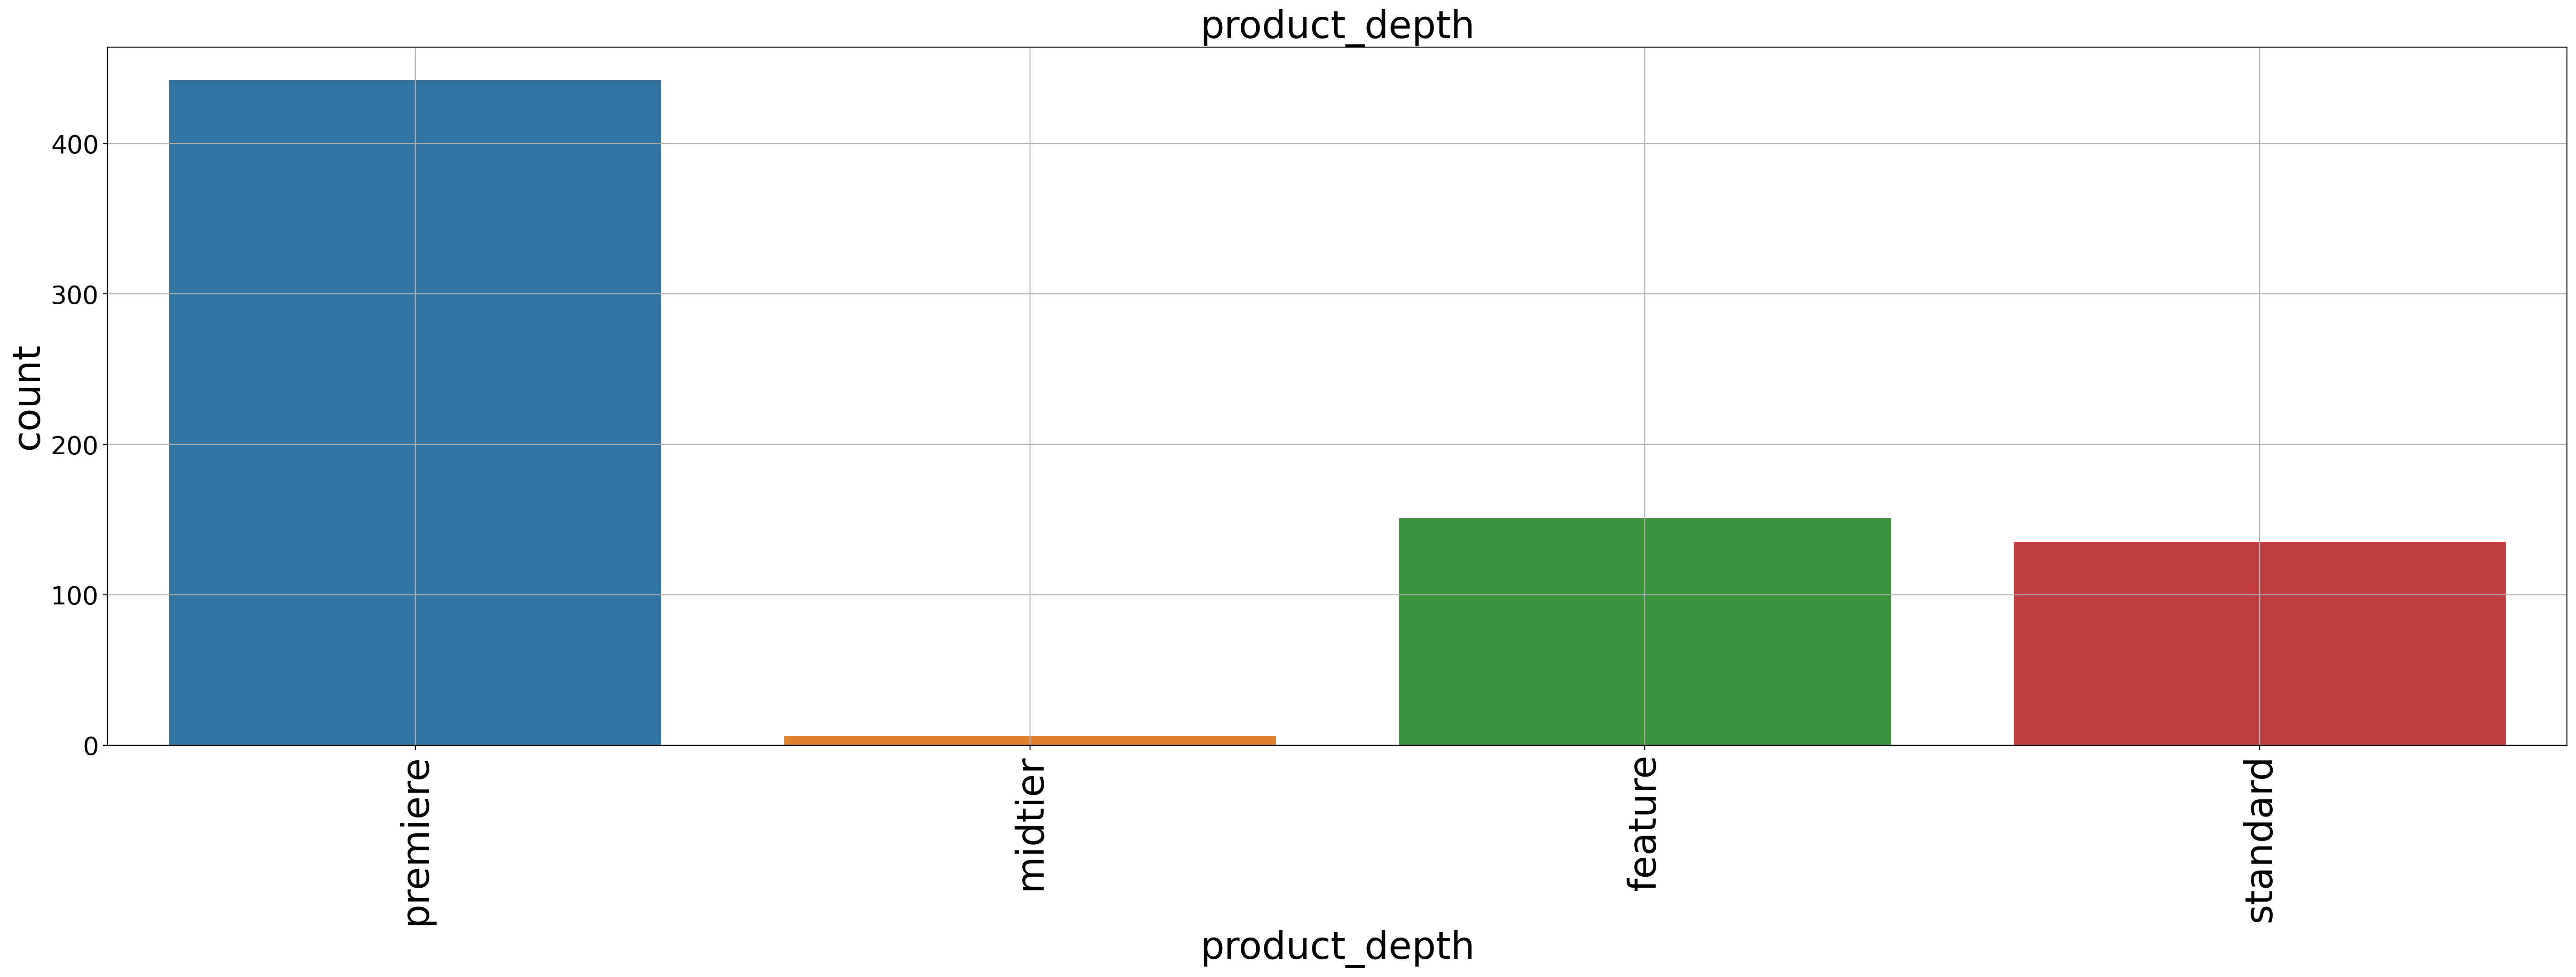

In [29]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='product_depth' , data= df )
plt.xlabel('product_depth',fontsize=30)
plt.xticks(rotation = 90 , fontsize=30)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('product_depth' , fontsize=30)
plt.grid()
plt.show()

- **Premiere**: This category represents the most substantial part of the dataset. These properties might be characterized by high quality, premium features, or exclusive locations.
- **Standard**: The second most common category, "Standard" properties, may include typical residential or commercial offerings with standard features and locations.
- **Basic**: The "Basic" category has a lower count, potentially representing more affordable or entry-level properties.


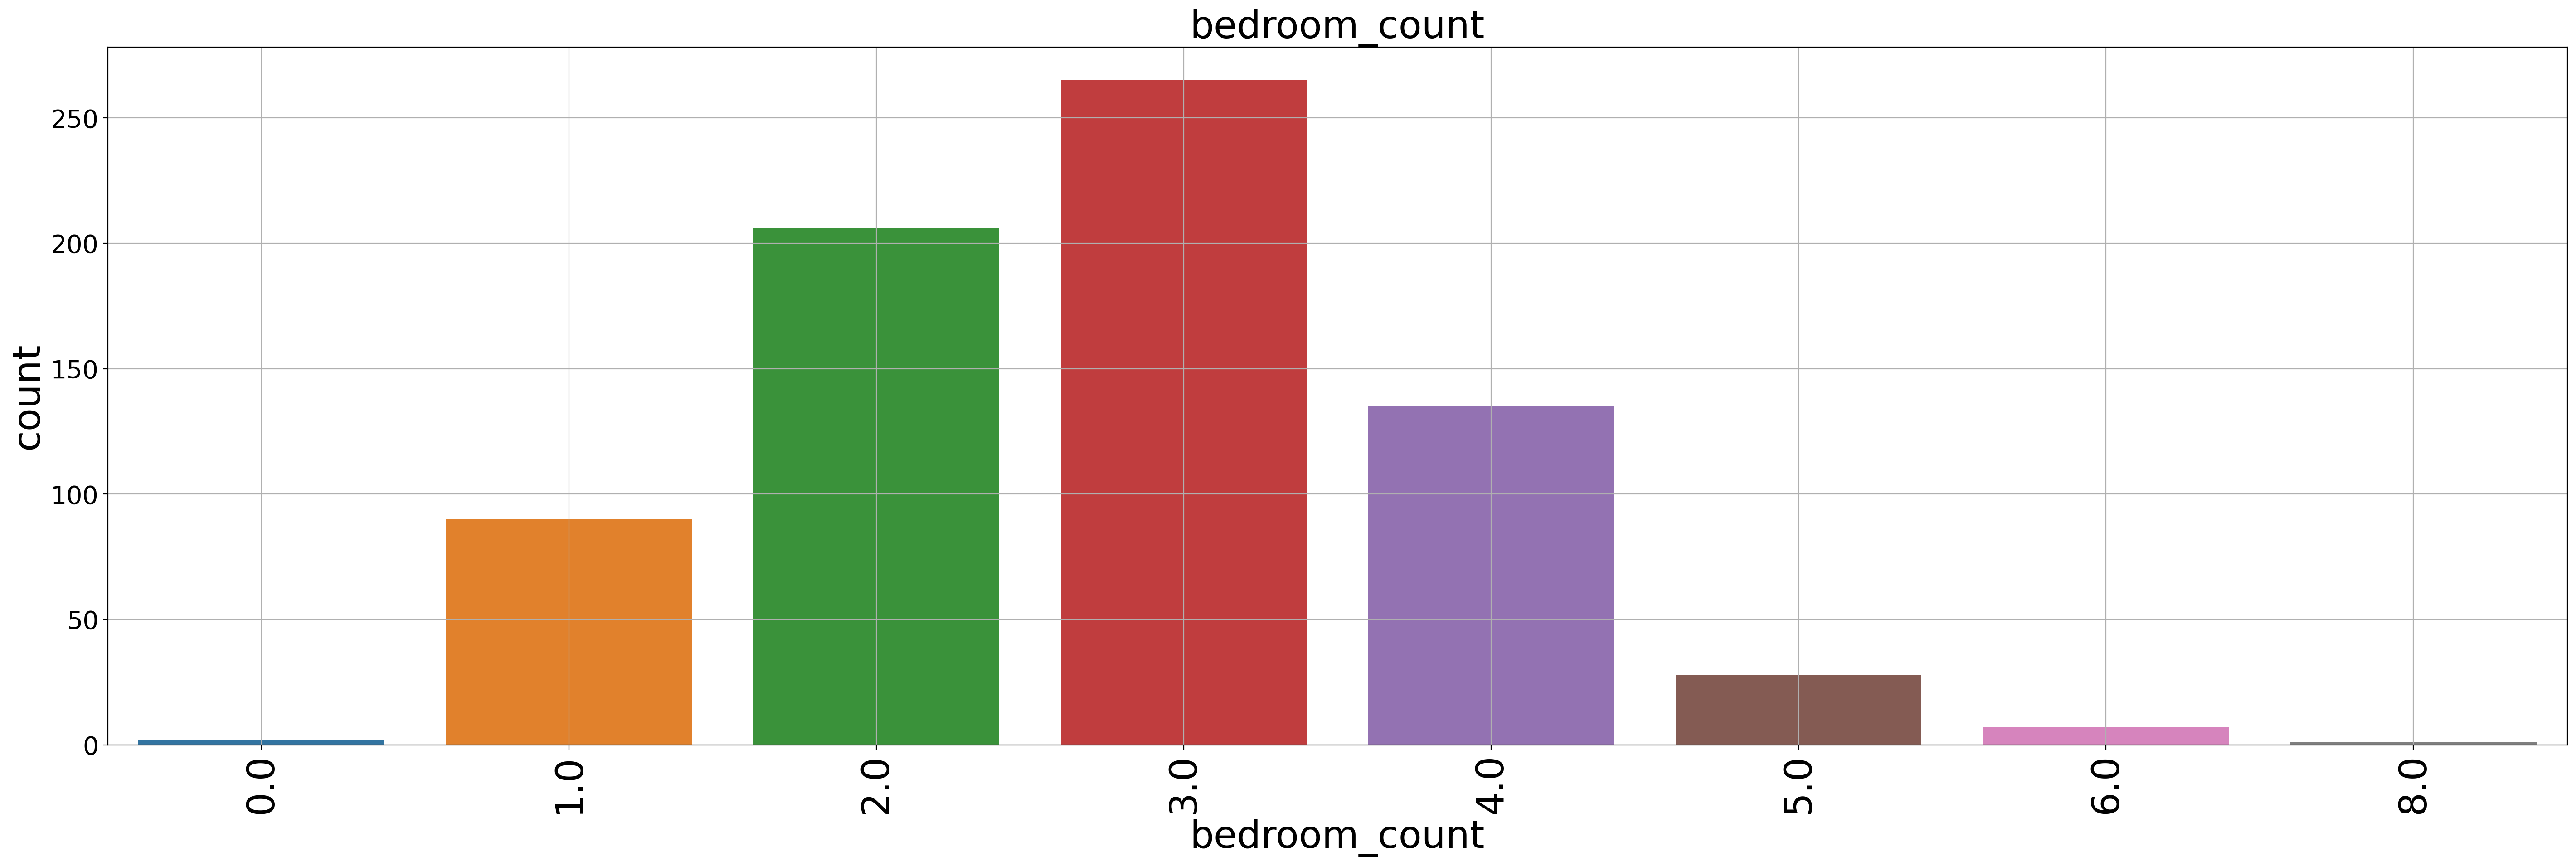

In [30]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='bedroom_count' , data= df )
plt.xlabel('bedroom_count',fontsize=30)
plt.xticks(rotation = 90 , fontsize=30)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('bedroom_count' , fontsize=30)
plt.grid()
plt.show()

- **3 Bedrooms**: The most common configuration, likely reflecting typical family homes or standard residential units.
- **2 Bedrooms**: The second most frequent count, possibly representing apartments, townhouses, or smaller family homes.
- **4 Bedrooms**: This category might include larger family homes, luxury apartments, or properties with additional rooms for offices or guests.
- **1 Bedroom and Fewer**: These include studio apartments, single-bedroom units, or specialized living arrangements, such as student housing.
- **More than 4 Bedrooms**: These properties may include large family homes, multi-generational living, or high-end luxury properties.

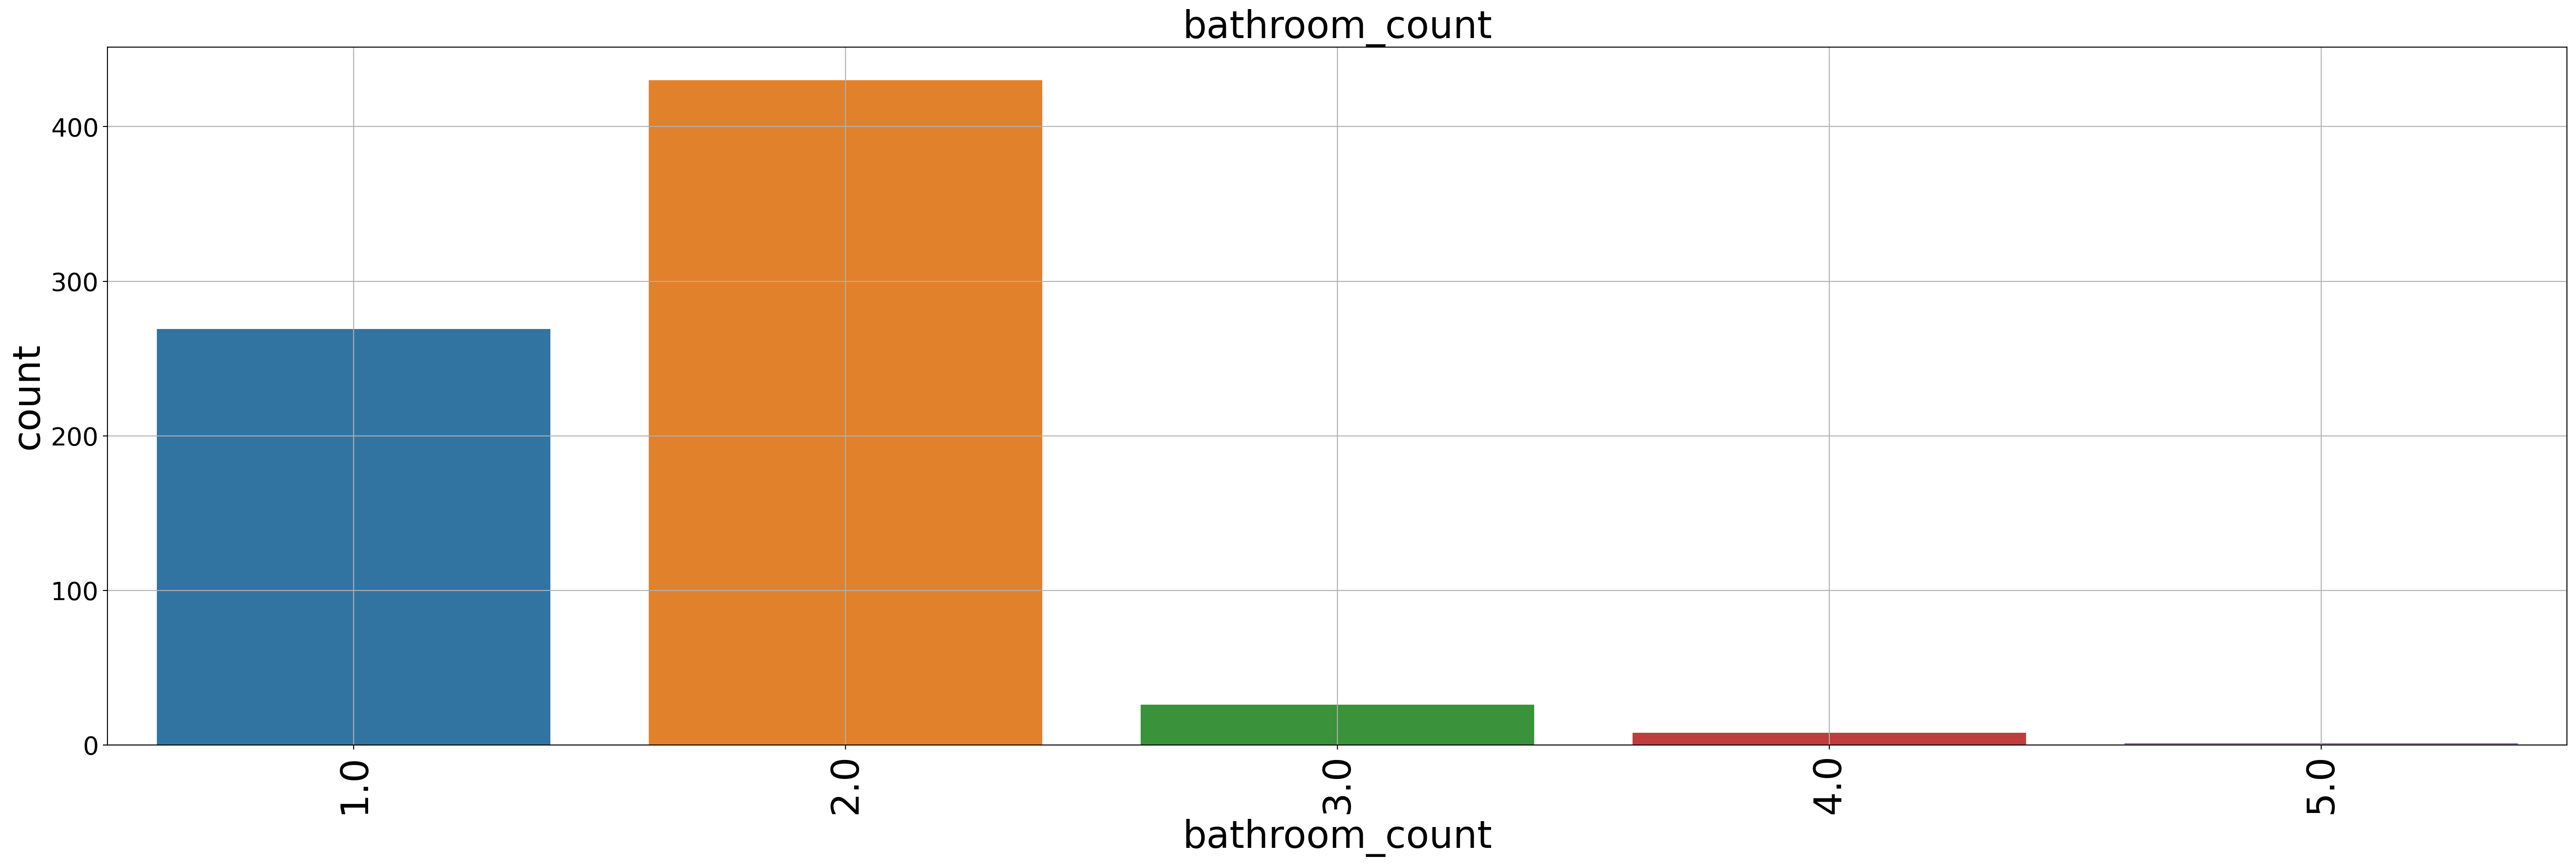

In [31]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='bathroom_count' , data= df )
plt.xlabel('bathroom_count',fontsize=30)
plt.xticks(rotation = 90 , fontsize=30)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('bathroom_count' , fontsize=30)
plt.grid()
plt.show()

- **2 Bathrooms**: The most common configuration, reflecting a standard setup in many family homes, apartments, and townhouses.
- **1 Bathroom**: The second most frequent count, possibly found in smaller apartments, single-bedroom units, or budget-friendly properties.
- **3 Bathrooms**: These may be associated with larger family homes or properties with additional amenities.
- **More than 3 Bathrooms**: Properties with more than three bathrooms are less common and may represent luxury homes, larger family residences, or commercial properties.

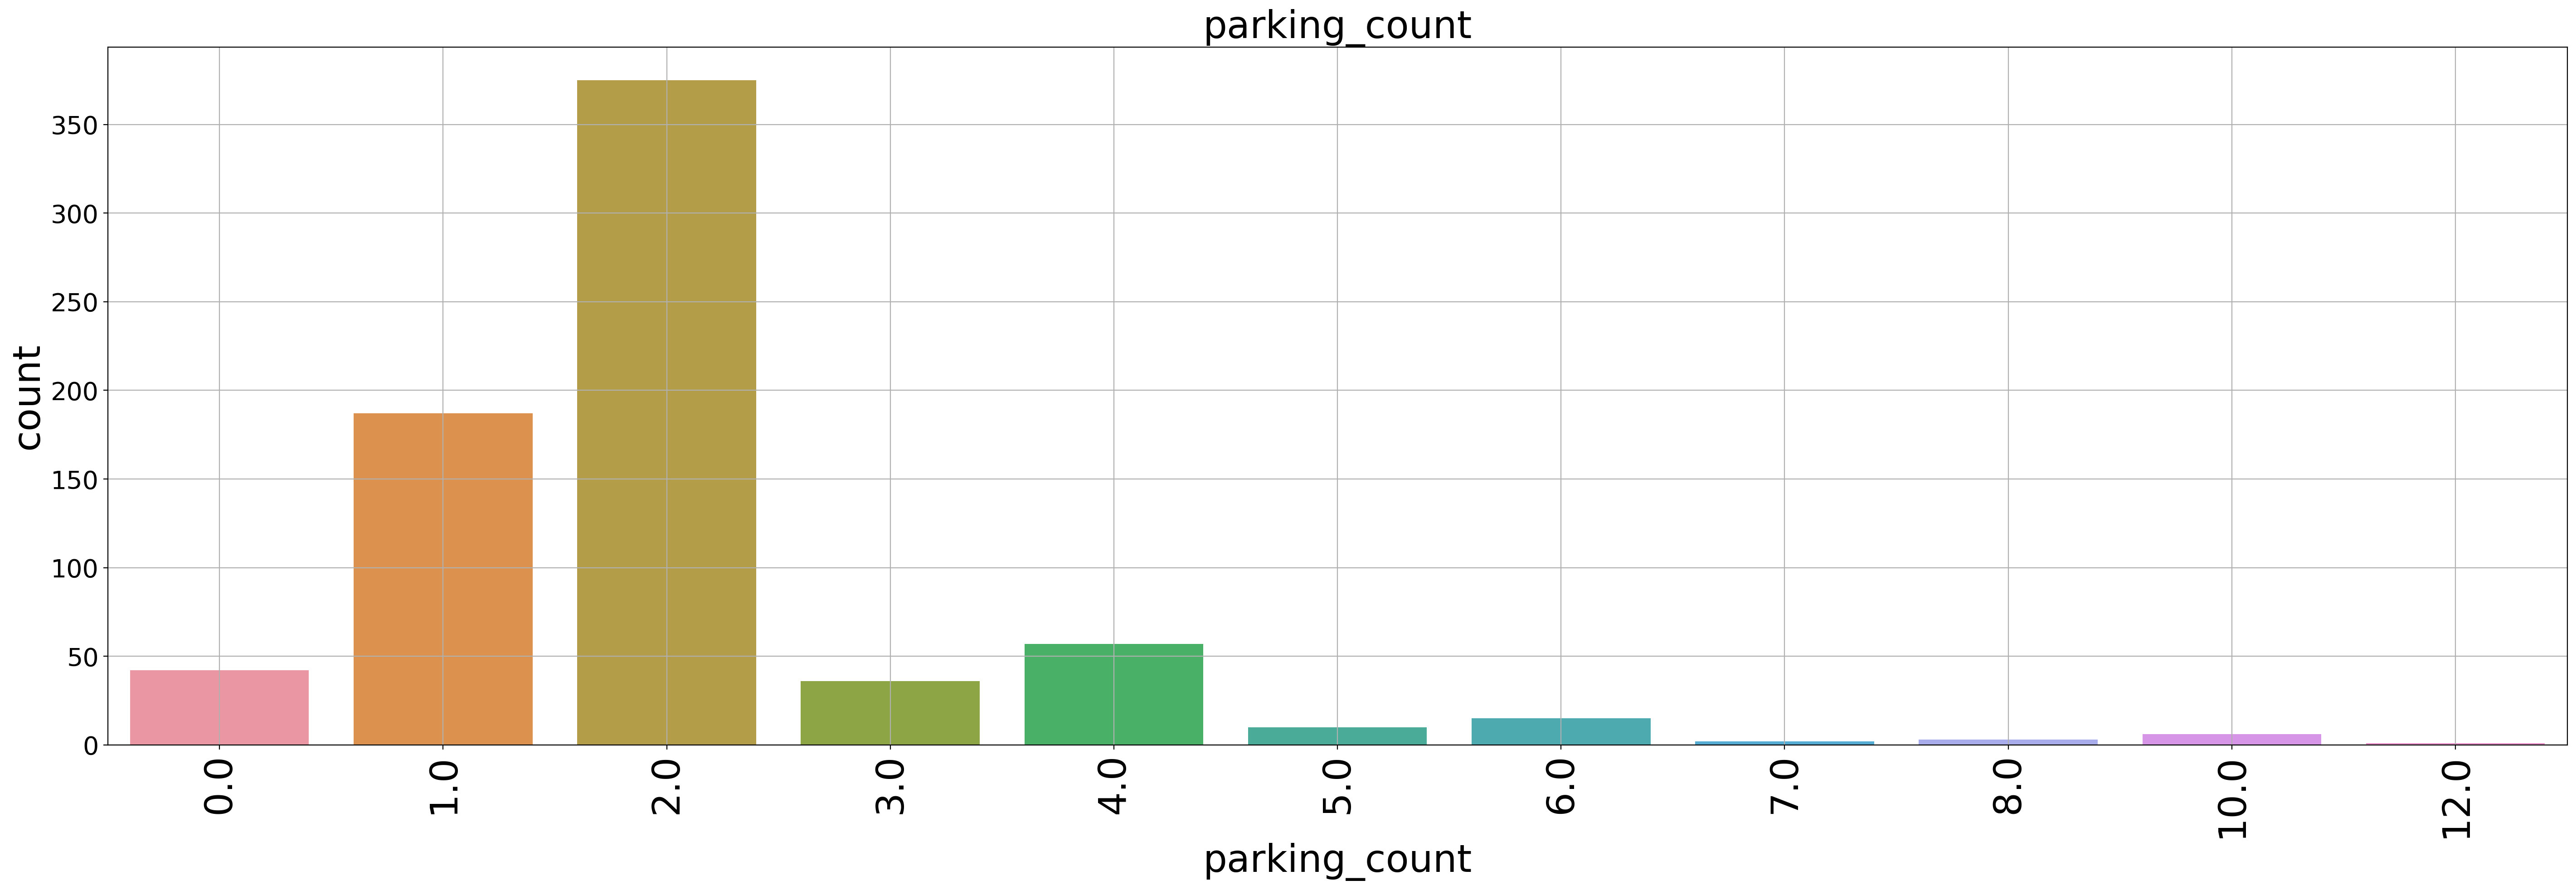

In [32]:
plt.figure(figsize=(35,10), dpi=200)
ax =sns.countplot(x='parking_count' , data= df )
plt.xlabel('parking_count',fontsize=30)
plt.xticks(rotation = 90 , fontsize=30)
plt.ylabel('count',fontsize=30)
plt.yticks(fontsize=20)
plt.title('parking_count' , fontsize=30)
plt.grid()
plt.show()

- **2 Parking Spaces**: The most common configuration, often found in family homes, townhouses, and apartments with dedicated parking.
- **1 Parking Space**: The second most frequent count, reflecting properties with limited parking, such as smaller apartments or urban locations.
- **0 Parking Spaces**: A significant number of properties have no parking spaces, possibly representing inner-city apartments, shared housing, or properties relying on street parking.
- **More than 2 Parking Spaces**: These may include larger family homes, luxury properties, or commercial real estate with additional parking amenities.

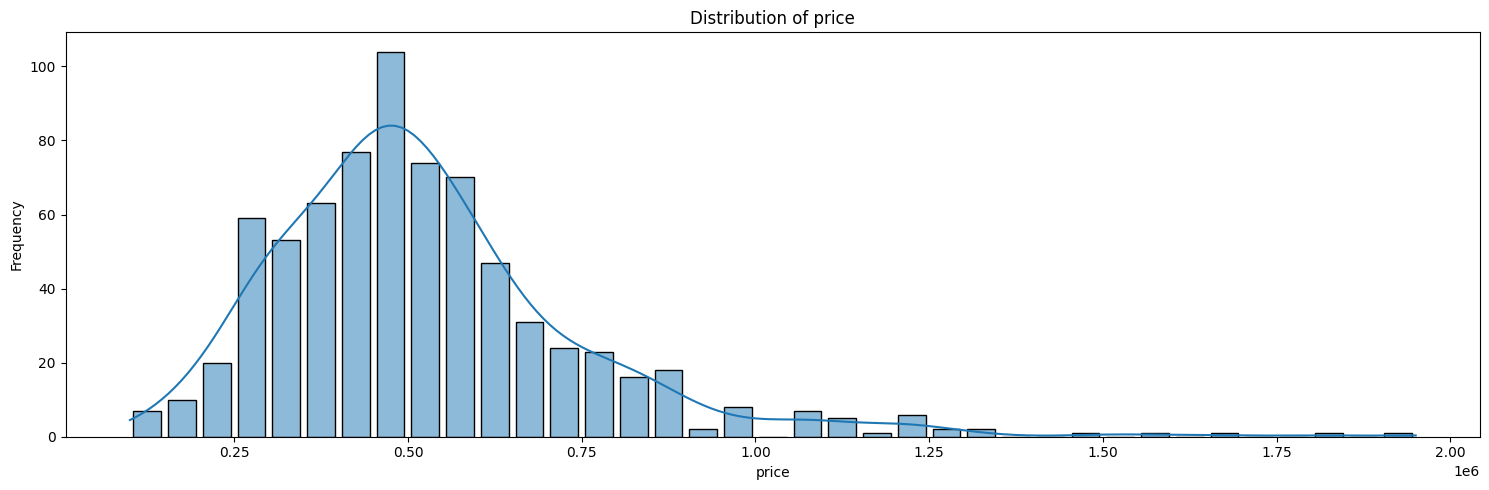

In [33]:
# Select the columns to be plotted
plot_cols = df.columns[ df.columns.isin(['price']) ]

# Calculate the number of rows for subplots
n_cols = 1
n_rows = -(-len(plot_cols) // n_cols)  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)



for i, col in enumerate(plot_cols):
    row, col_idx = divmod(i, n_cols)
    sns.histplot(data=df, x=col, kde=True, edgecolor="0", palette='Paired', ax=axes[row, col_idx], multiple='dodge', shrink=0.8)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i+1, n_rows*n_cols):
    row, col_idx = divmod(j, n_cols)
    fig.delaxes(axes[row][col_idx])

plt.tight_layout()
plt.show()

The histogram visualizes the distribution of property prices in the dataset, providing insights into the range, central tendencies, and variations in pricing:

- **Distribution Shape**: The histogram shows a right-skewed distribution, with most properties falling in the lower to middle price range and fewer properties at the higher end.
- **Peak**: The peak of the distribution represents the most common price range, likely reflecting typical residential properties or standard market offerings.
- **Tail**: The long tail extending to the right indicates the presence of higher-priced properties, such as luxury homes, commercial real estate, or exclusive locations.
- **Kernel Density Estimate (KDE)**: The smooth line (KDE) provides an estimate of the underlying probability density function, highlighting the overall shape and patterns in the price distribution.

Understanding the price distribution is essential for market analysis, pricing strategies, investment decisions, and modeling property values. It helps identify opportunities, risks, and trends in the real estate market.

# Conclusion

### Initial Investment:
The median home price is quite modest, the median condo price is in the middle of the price range, and the median office building price is significantly more than the median home price.

### Property Categories:
Single-family homes and condominiums make up the bulk of the residential real estate market.
Alternative or specialised housing options, such as apartments, are included.

### Analysis of the Site:
The cityscapes viewed included a variety of urban, suburban, and rural locales. Real estate hotspots are most likely to be found in major cities.
There is a large variation across zip codes, from highly populated downtown districts to rapidly expanding suburbs to sparsely populated rural areas.

### Listed Companies:
The market structure is competitive and diverse, with a mix of large and medium agencies and smaller enterprises.

### In-Depth Analysis:
Classification based on quality, characteristics, or market position, from "premier" to "basic." The most typical type of property was a "premiere" one.

### Specifics of the House:
Number of Bedrooms: Typically 2-4 bedrooms, though this might vary depending on floorplan and overall home size.
Standard single-family homes and multi-room flats usually have two or three toilets and showers.
Reflecting urban planning, property type, and consumer preferences, the number of parking spots might range from none to several.

### Connections and Consequences
There is probably a relationship between the asking price and specifics like the number of bedrooms and bathrooms, as well as other amenities like garage space.
Location and agency might affect marketing and financial decisions because certain firms focus on specific areas or kinds of real estate.
Product Variety: The "Premiere," "Standard," and "Basic" classifications may be based on the property's nature, location, and price, respectively, facilitating segmentation and targeting.

### Think About The Science And The Strategy:
Segmenting the market is essential for effective marketing, capitalising on investment opportunities, and developing desirable products.
Predictive modelling, like that used for making predictions about future prices or consumer demand, is possible thanks to the connections between these factors.
The location, property type, and qualities of a certain area can shed light on broader issues of urban planning, housing policy, and community development.

### Restrictions and Prospects:
In this section, we dealt with a wide variety of data-related issues. There were a number of issues, ranging from location features that should be displayed better to crucial columns that were accompanied by empty cells. With this quantity and quality of data, modelling is pointless, but if we had more basic parameters and, of course, more data, we could achieve a comprehensive modelling.


Deeper insights and more accurate forecasts can be obtained through the use of advanced analytics techniques like machine learning and econometric modelling.

